In [95]:
import numpy
import math
import scipy.special
import matplotlib.pyplot as plt
import scipy.ndimage
from tqdm import tqdm
%matplotlib inline

In [74]:
# проверим, что все нормально считалось, взяв первую строчку датасета и превратим ее обратно в картинку
check = train_data_list[1].split(",")
image_array = numpy.asfarray(check[1:]).reshape(28, 28)

In [74]:
# проверим, что все нормально считалось, взяв первую строчку датасета и превратим ее обратно в картинку
check = train_data_list[1].split(",")
image_array = numpy.asfarray(check[1:]).reshape(28, 28)

In [74]:
# проверим, что все нормально считалось, взяв первую строчку датасета и превратим ее обратно в картинку
check = train_data_list[1].split(",")
image_array = numpy.asfarray(check[1:]).reshape(28, 28)

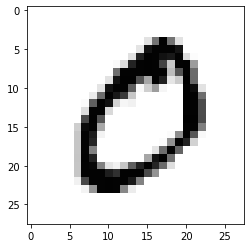

In [75]:
# вывод картинки цифры с помощью imshow
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [76]:
# инициализируем нейронную сеть
input_nodes = 784 # кол-во входных нейронов
hidden_nodes = 200 # кол-во скрытых нейронов
output_nodes = 10 # кол-во выходных нейронов
learning_rate = 0.01 # коэф. обучения 

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate) # создаем объект класса нашей нейронки

In [77]:
# здесь проводим обучение нашей сетки
# делаем 5 эпох == 5 раз прогоняем обучение на одном и том же датасете
epochs = 5
for e in range(epochs):
    # построчно считываем датает
    for record in tqdm(train_data_list):
        all_values = record.split(",")
        # переводим значения цветов пикселей в размерность значений от 0 до 1, чтоб все работало нормально
        # (нормализуем данные то есть) 255 - максимальное возможное значение цвета есь чо
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создаем корректный формат настоящего ответа. ибо изначально это лишь одна цифра, нам же нужен массив, 
        # где в значении под индексом цифры стоит 0.99, а все остальное 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        
        # кидаем пример на обучение
        n.train(inputs, targets)
        
        # тут шаманства. Называется аугментации. Трюк в том, чтобы искусственно увеличить датасет с помощью того, что
        # мы просто картинку поворачиваем на 10 градусов влево и называем это новым примером. Поворачиваем на 10 градусов вправо
        # еще один новый пример. Таким образом мы увеличиваем датасет в 3 раза и учим нейронку распознавать цифры написанные под углом
        inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), 10, cval=0.01, order=1 ,reshape=False)
        n.train(inputs_plus10_img.reshape(784), targets)
        inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), -10, cval=0.01, order=1 ,reshape=False)
        n.train(inputs_minus10_img.reshape(784), targets)

100%|██████████| 60000/60000 [01:59<00:00, 502.14it/s]


In [51]:
# то же, что и сверху, но без тюнинга
# for record in tqdm(train_data_list):
#     all_values = record.split(",")
#     inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#     targets = numpy.zeros(output_nodes) + 0.01
#     targets[int(all_values[0])] = 0.99
#     n.train(inputs, targets)

In [78]:
# открываем данные для теста
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [79]:
# точно так же, как и в предыдущй раз чекаем, что все норм
all_values = test_data_list[0].split(',')
print(all_values[0])

7


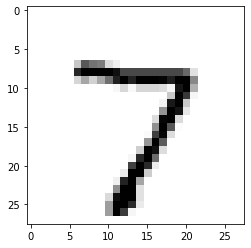

In [80]:
# выводим картинку ровно так же, как и в прошлый раз
image_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [81]:
# тестово смотрим на предсказание нашей сети для самого первого тестового примера. Видим, что наша сеть на 98 процентов уверена,
# что это семерка тип индекс 7, понел
a = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
print(a)

[[0.0128347 ]
 [0.00666933]
 [0.00237738]
 [0.00964521]
 [0.00683011]
 [0.01315142]
 [0.00323099]
 [0.98927587]
 [0.00548253]
 [0.00906609]]


In [82]:
# подсчитываем accuracy нашей сети, тупо прогоняя все тестовые примеры и смотрим если наша нейронка угадала
# записываем 1, если нет, то 0
scorecard = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
#     print(correct_label, "истинный маркер")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
#     print(label, "ответ сети")
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [83]:
# можешь расскоментить и посмотреть как это выглядит
# scorecard

In [84]:
# ну а теперь смотрим на отношение правильных ответов ко всем ответам это и есть accuracy
scorecard_array = numpy.asarray(scorecard)
print('эффективность = ', scorecard_array.sum() / scorecard_array.size)

эффективность =  0.9736


In [85]:
import imageio
import glob

In [91]:
# ну дальше я уже решил сам нарисовать цифру в пэйнте и чекнуть, реально ли сеть работает правильно
img_array = imageio.imread('test6.png', as_gray=True)

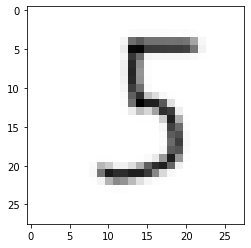

In [92]:
# инвертирую цвета для корректной работы, чекаю, что все норм и я реально дал картинку пятерки
img_data = 255.0 - img_array.reshape(784)
img_data1 = img_data.reshape(28, 28)
plt.imshow(img_data1, cmap="Greys", interpolation="None")

In [93]:
# нормализовал значение пикселей, чтоб сеть все нормально поняла
img_data = (img_data / 255.0 * 0.99) + 0.01

In [94]:
# чекнул ответ сети. она думает, что это 5
numpy.argmax(n.query(img_data))

5